In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# <span style='background:yellow'>Proportional improvement (post - pre / 1 - pre)

In [3]:
df=pd.read_excel('../pre-post_experiment/results/PrimaryResults_prepost.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
145,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
146,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
147,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
148,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


In [4]:
df[((df['group']=='aud')&(df['Time']=='Post'))]['AudReg'].mean()

0.7261538461538463

In [6]:
diff_data = {}
for col in df.columns[1:10]:
    differences = []
    for i in range(0, 150, 2):
        pre_value = df.iloc[i][col]
        post_value = df.iloc[i+1][col]
        if pre_value == 1:
            diff = (post_value - pre_value).round(2)
        else:
            diff = ((post_value - pre_value) / (1 - pre_value)).round(2)
#             diff = ((df_aud.iloc[i+1][col] - df_aud.iloc[i][col]) / (1 - df_aud.iloc[i][col])).round(2) # post - pre / 100 - pre
        differences.append(diff)
    diff_data[f'{col}_diff'] = differences
    diff_data['Group']=[df['group'][i] for i in df['group'].index if i%2==0]
    diff_data['Name']=[df['Name'][i].split('_')[0] for i in df['Name'].index if i%2==0]

diff_df = pd.DataFrame(diff_data)
diff_df

,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
0,0.00,aud,train10,-0.17,0.76,-0.31,-0.57,-0.35,-0.37,-0.28,0.68
1,0.44,vis,train11,0.37,0.00,-0.25,-0.07,0.18,-0.31,0.32,-0.36
2,0.00,notrain,train14,0.41,0.07,0.00,0.34,0.51,0.21,-0.08,-0.06
3,-0.21,aud,train15,0.00,0.26,-1.36,-0.17,-0.68,0.17,-1.57,0.56
4,-0.71,vis,train16,0.09,-0.35,0.26,-0.59,0.00,-0.36,0.14,-0.14
...,...,...,...,...,...,...,...,...,...,...,...
70,-1.00,vis,train7,0.61,0.28,-0.45,0.22,0.13,0.42,-0.09,0.12
71,-0.37,vis,train80,0.11,-0.46,-1.30,-1.68,-0.24,-0.50,0.11,0.06
72,1.00,aud,train81,0.68,0.50,0.60,0.54,0.40,0.29,0.28,0.82
73,0.24,notrain,train8,-1.71,-0.12,0.00,0.47,0.13,0.00,-0.29,0.45


In [7]:
diff_df[diff_df['Group']=='aud'][['AudSD_diff','AudIrreg_diff','AudReg_diff']].mean()


AudSD_diff      -0.194615
AudIrreg_diff    0.066538
AudReg_diff      0.221154
dtype: float64

In [8]:
diff_df[diff_df['Group']=='vis'][['VisSD_diff','VisIrreg_diff','VisReg_diff']].mean()


VisSD_diff      -0.1788
VisIrreg_diff   -0.0096
VisReg_diff      0.2116
dtype: float64

# Auditory performance

In [9]:
# df_filtered = diff_df[(diff_df['Name'] != 'train18') & (diff_df['Name'] != 'train26')]
df1=diff_df.melt(['Group'],['AudSD_diff','AudIrreg_diff','AudReg_diff'],var_name='Timing_level',value_name='value')
print(len(df1))
df1

225


,Group,Timing_level,value
0,aud,AudSD_diff,0.00
1,vis,AudSD_diff,0.44
2,notrain,AudSD_diff,0.00
3,aud,AudSD_diff,-0.21
4,vis,AudSD_diff,-0.71
...,...,...,...
220,vis,AudReg_diff,0.28
221,vis,AudReg_diff,-0.46
222,aud,AudReg_diff,0.50
223,notrain,AudReg_diff,-0.12


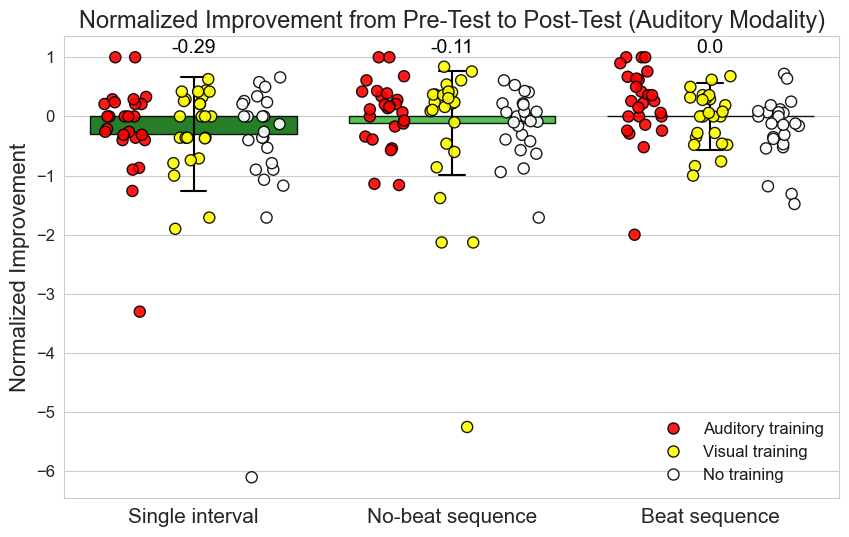

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df1, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df1, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=False, fontsize=12, labelcolor='0.1', title_fontsize='large')
    
for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')

plt.show()

In [14]:
df11=df1[df1['Group']=='aud']
df12=df1[df1['Group']=='vis']
df13=df1[df1['Group']=='notrain']
df12.head(7)

,Group,Timing_level,value
1,vis,AudSD_diff,0.44
4,vis,AudSD_diff,-0.71
7,vis,AudSD_diff,-1.90
10,vis,AudSD_diff,0.33
11,vis,AudSD_diff,-1.71
13,vis,AudSD_diff,0.29
18,vis,AudSD_diff,0.63


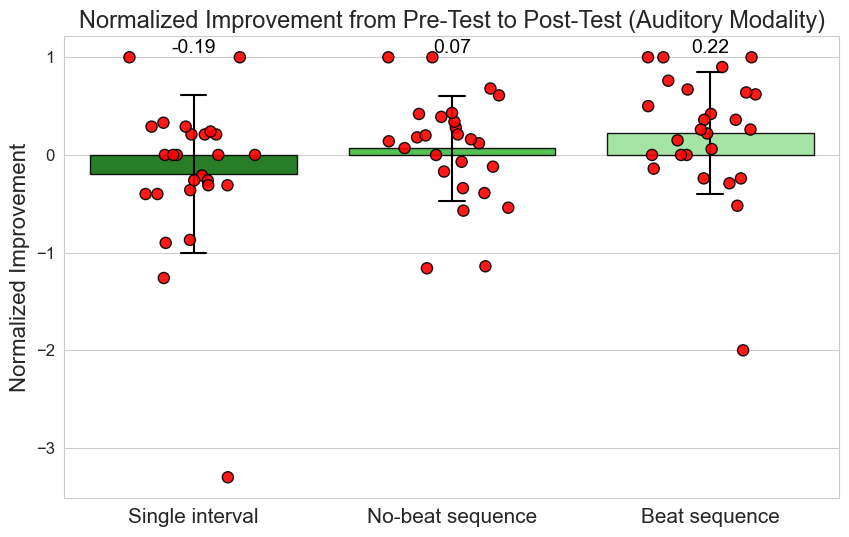

In [16]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df11, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df11, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

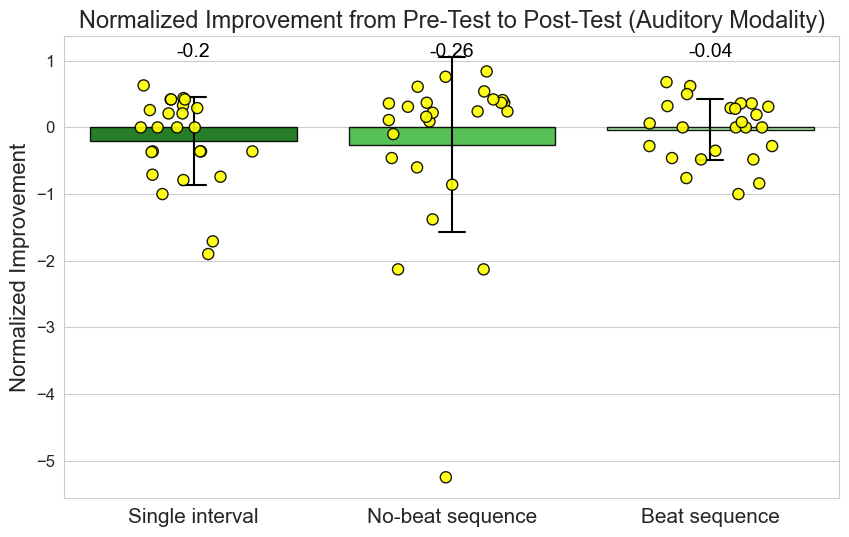

In [18]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df12, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df12, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

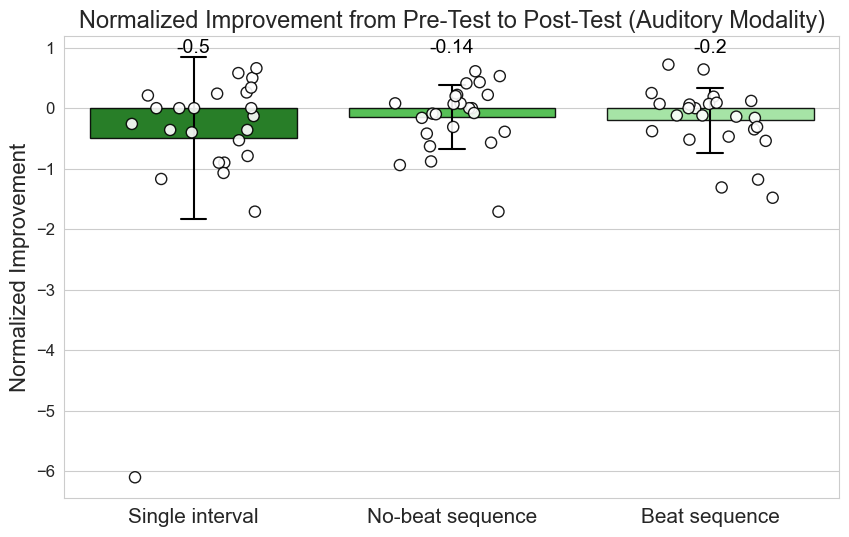

In [19]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df13, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df13, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [0.85, 0.85, 0.85]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

# Visual performance

In [20]:
df2=diff_df.melt(['Group'],['VisSD_diff','VisIrreg_diff','VisReg_diff'],var_name='Timing_level',value_name='value')
df2

,Group,Timing_level,value
0,aud,VisSD_diff,-0.31
1,vis,VisSD_diff,-0.25
2,notrain,VisSD_diff,0.00
3,aud,VisSD_diff,-1.36
4,vis,VisSD_diff,0.26
...,...,...,...
220,vis,VisReg_diff,0.13
221,vis,VisReg_diff,-0.24
222,aud,VisReg_diff,0.40
223,notrain,VisReg_diff,0.13


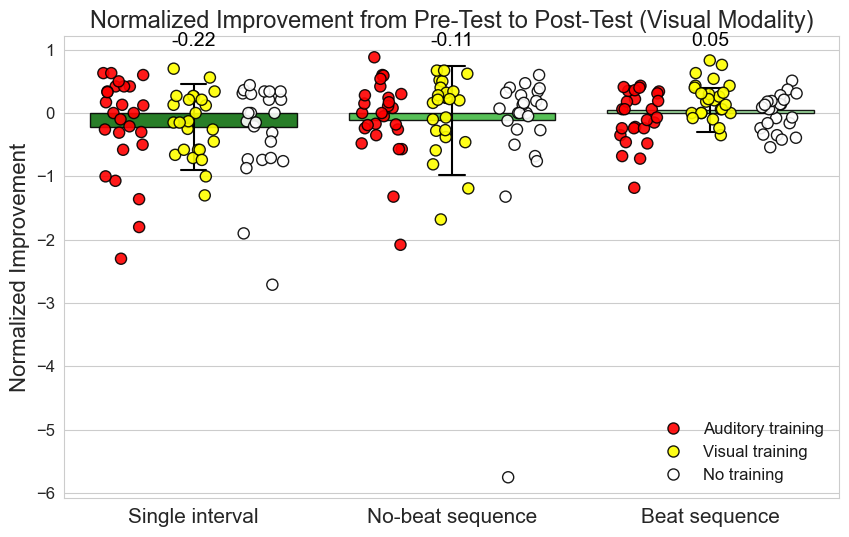

In [21]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df2, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df2, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=False, fontsize=12, labelcolor='0.1', title_fontsize='large')
    
for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')

plt.show()

In [22]:
df21=df2[df2['Group']=='aud']
df22=df2[df2['Group']=='vis']
df23=df2[df2['Group']=='notrain']
df22.head(7)

,Group,Timing_level,value
1,vis,VisSD_diff,-0.25
4,vis,VisSD_diff,0.26
7,vis,VisSD_diff,0.56
10,vis,VisSD_diff,-1.00
11,vis,VisSD_diff,0.34
13,vis,VisSD_diff,0.13
18,vis,VisSD_diff,-0.66


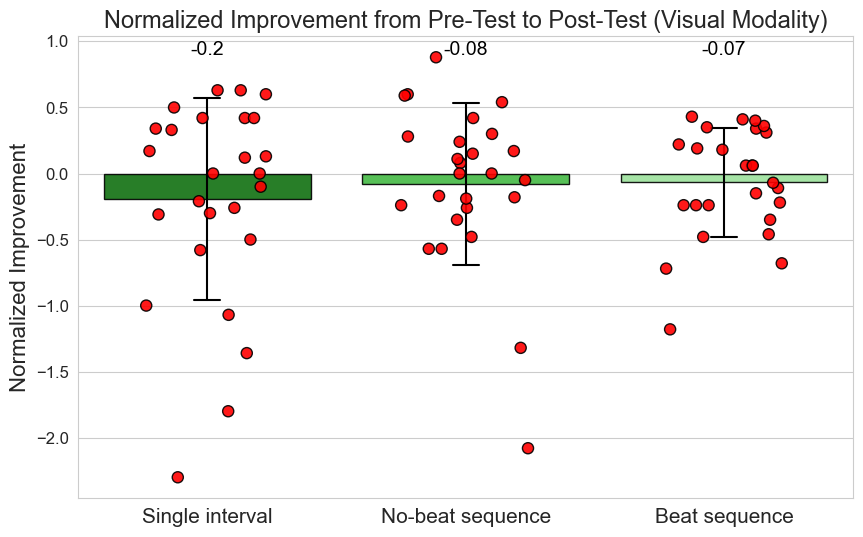

In [24]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df21, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df21, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [0.87, 0.87, 0.87]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

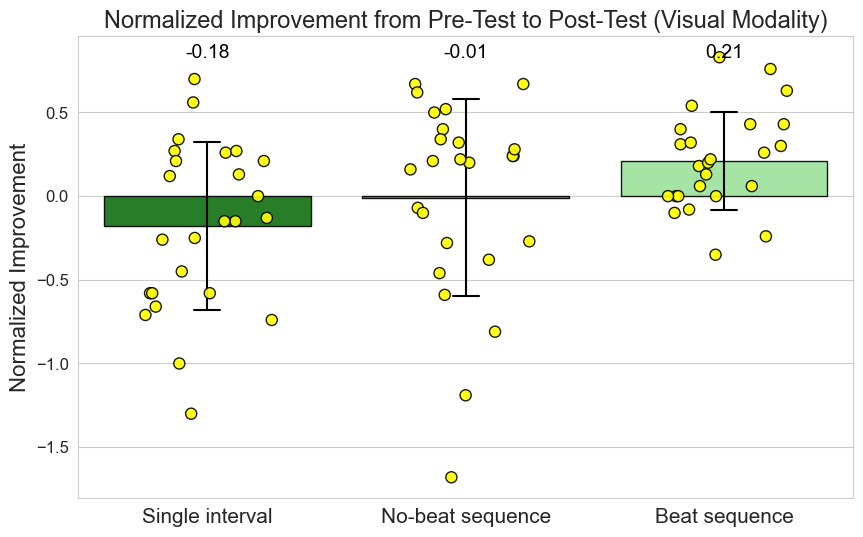

In [25]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df22, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df22, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

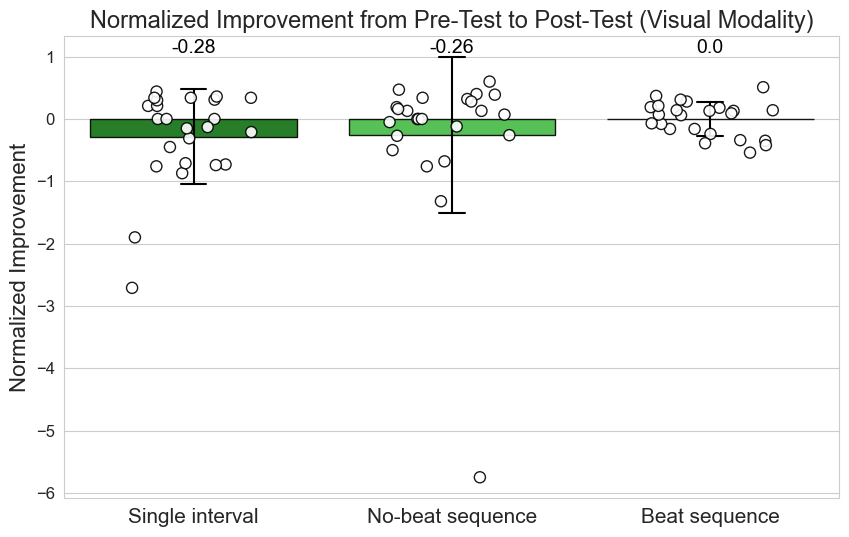

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df23, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],ec='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df23, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

# Tactile performance

In [27]:
df3=diff_df.melt(['Group'],['TactSD_diff','TactIrreg_diff','TactReg_diff'],var_name='Timing_level',value_name='value')
df3

,Group,Timing_level,value
0,aud,TactSD_diff,-0.37
1,vis,TactSD_diff,-0.31
2,notrain,TactSD_diff,0.21
3,aud,TactSD_diff,0.17
4,vis,TactSD_diff,-0.36
...,...,...,...
220,vis,TactReg_diff,0.12
221,vis,TactReg_diff,0.06
222,aud,TactReg_diff,0.82
223,notrain,TactReg_diff,0.45


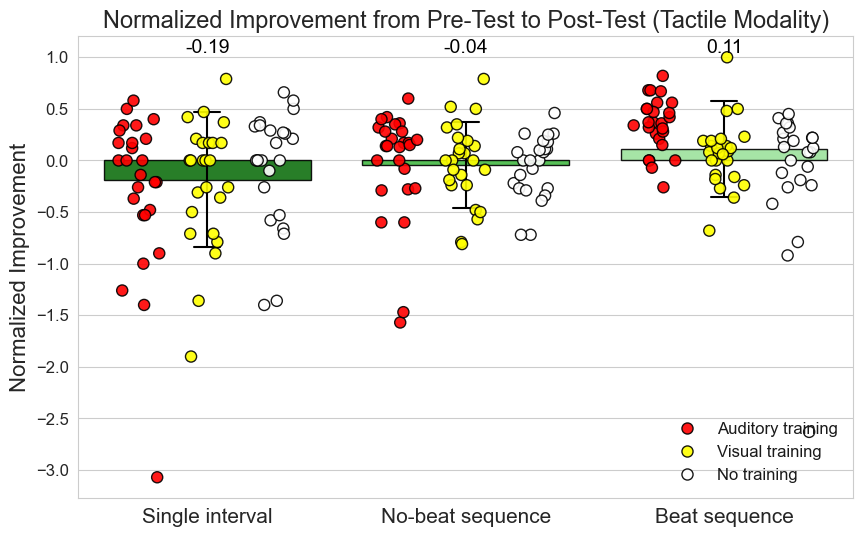

In [28]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df3, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df3, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=False, fontsize=12, labelcolor='0.1', title_fontsize='large')
    
for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')

plt.show()


In [29]:
df31=df3[df3['Group']=='aud']
df32=df3[df3['Group']=='vis']
df33=df3[df3['Group']=='notrain']
df32.head(7)

,Group,Timing_level,value
1,vis,TactSD_diff,-0.31
4,vis,TactSD_diff,-0.36
7,vis,TactSD_diff,-0.79
10,vis,TactSD_diff,0.00
11,vis,TactSD_diff,-0.26
13,vis,TactSD_diff,0.00
18,vis,TactSD_diff,0.21


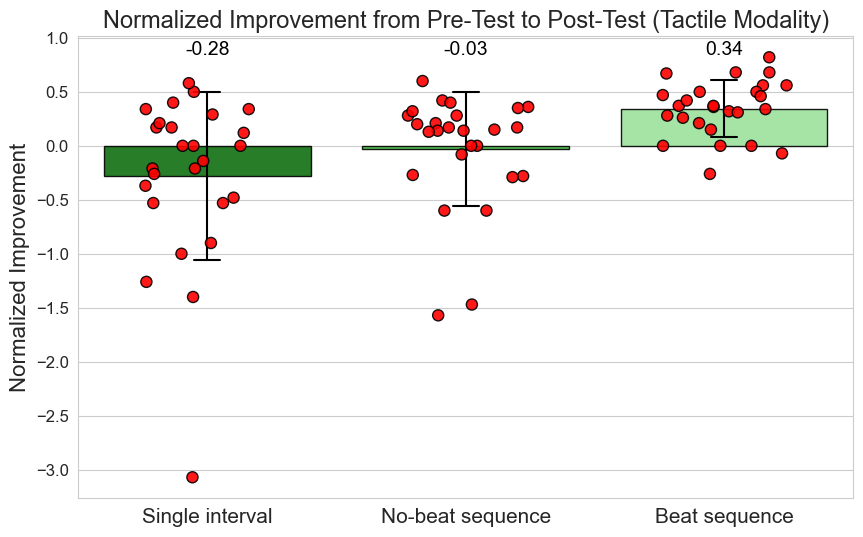

In [30]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df31, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df31, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

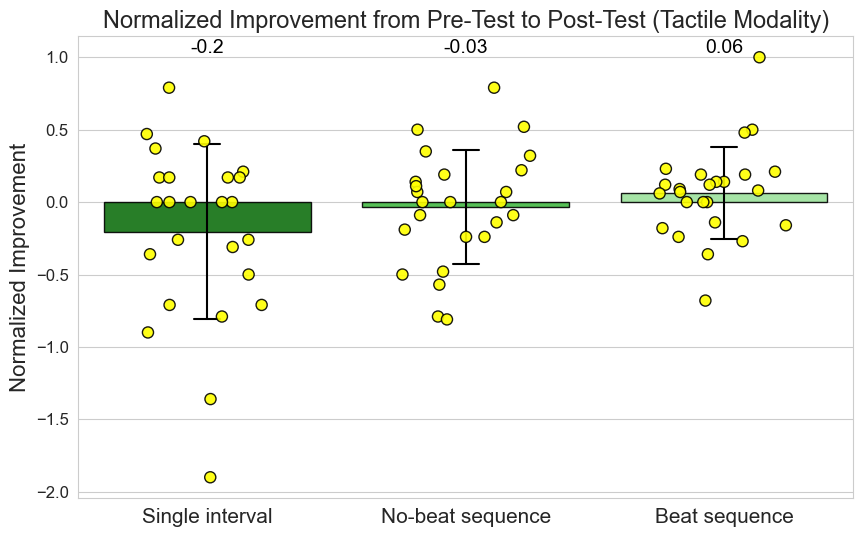

In [33]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df32, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df32, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
    
plt.show()

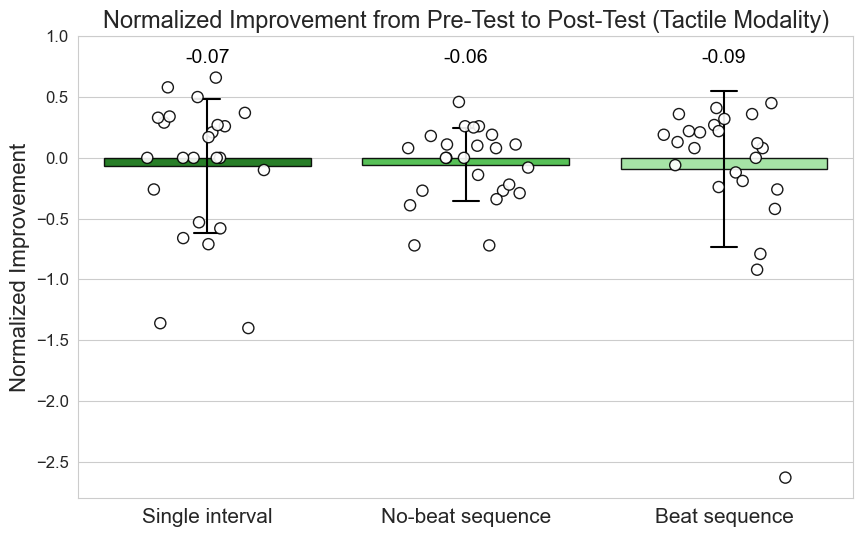

In [35]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df33, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df33, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Normalized Improvement', size=16)
g.set_title('Normalized Improvement from Pre-Test to Post-Test (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=15)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=12)

heights = [0.75, 0.75, 0.75]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=14, color='black')
plt.ylim(-2.8,1)
plt.show()

# <span style= "background:yellow">Finding outliers in each task

In [36]:
# Outliers in AudSD task
m=diff_df['AudSD_diff'].mean()
sd=diff_df['AudSD_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['AudSD_diff']<threshold]
# 0.9 > 0.29
# 0.9 > 0.57 

-0.29306666666666664
0.9670811102869675
-3.1943099975275695


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
6,-6.1,notrain,train18,-0.31,-0.35,-0.73,-1.32,-0.24,-0.58,0.00,-0.26
14,-3.3,aud,train26,0.61,-2.00,0.42,0.60,-0.48,-0.90,0.14,0.00


In [37]:
m=diff_df['AudIrreg_diff'].mean()
sd=diff_df['AudIrreg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['AudIrreg_diff']<threshold]
# 0.96 > 0.75

-0.10919999999999999
0.8725881973543775
-2.7269645920631325


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
67,0.42,vis,train77,-5.25,0.36,0.21,0.34,0.06,-0.71,-0.81,0.23


In [38]:
m=diff_df['AudReg_diff'].mean()
sd=diff_df['AudReg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['AudReg_diff']<threshold]
# 0.96 > 0.88

9.25185853854297e-18
0.5646620610978245
-1.6939861832934735


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
14,-3.3,aud,train26,0.61,-2.0,0.42,0.6,-0.48,-0.9,0.14,0.0


In [39]:
# Outliers in VisSD task
m=diff_df['VisSD_diff'].mean()
sd=diff_df['VisSD_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['VisSD_diff']<threshold]
# 0.9 > 0.67 
# 0.86 > 0.48

-0.21826666666666664
0.6787914007747636
-2.2546408689909576


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
21,-0.40,aud,train32,0.34,0.42,-2.30,-0.26,0.18,-0.21,-0.60,0.56
55,0.21,notrain,train65,0.53,0.07,-2.71,0.13,0.14,0.34,0.18,0.00


In [40]:
m=diff_df['VisIrreg_diff'].mean()
sd=diff_df['VisIrreg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['VisIrreg_diff']<threshold]
# 0.92 > 0.46

-0.11426666666666664
0.8574241331710603
-2.686539066179847


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
60,-1.07,notrain,train6,-0.88,-0.31,-1.9,-5.75,-0.42,-1.4,-0.72,-0.79


In [41]:
m=diff_df['VisReg_diff'].mean()
sd=diff_df['VisReg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['VisReg_diff']<threshold]
# 0.83 > 0.63

0.04773333333333334
0.35002537874526435
-1.0023428029024597


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
8,-0.26,aud,train1,1.0,1.0,0.12,0.88,-1.18,0.0,0.6,0.36


In [42]:
# Outliers in TactSD task
m=diff_df['TactSD_diff'].mean()
sd=diff_df['TactSD_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['TactSD_diff']<threshold]
# 0.86 > 0.43

-0.18639999999999998
0.6515587132076102
-2.1410761396228306


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
5,-1.26,aud,train17,-0.54,-0.29,-0.5,-0.35,-0.22,-3.07,0.17,0.37


In [43]:
m=diff_df['TactIrreg_diff'].mean()
sd=diff_df['TactIrreg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['TactIrreg_diff']<threshold]
# 0.79 > 0.46
# 0.71 > 0.21
# 0.83 > 0.58

-0.0408
0.4157791773577945
-1.2881375320733834


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
3,-0.21,aud,train15,0.00,0.26,-1.36,-0.17,-0.68,0.17,-1.57,0.56
19,-0.36,aud,train30,-0.57,0.00,0.63,-1.32,0.06,-0.53,-1.47,0.21


In [44]:
m=diff_df['TactReg_diff'].mean()
sd=diff_df['TactReg_diff'].std()
print(m);print(sd)
threshold = m - 3*sd
print(threshold)
diff_df[diff_df['TactReg_diff']<threshold]
# 0.92 > 0.71

0.1112
0.46741659177897216
-1.2910497753369166


,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
36,0.26,notrain,train47,0.0,-1.18,-0.31,-0.26,-0.35,0.29,0.46,-2.63


# <span style='background:yellow'>Proportional improvement (post - pre / 1 - pre)(outliers removed)

In [47]:
df=pd.read_excel('../pre-post_experiment/results/PreprocessedResults_NoOutliers.xlsx')
df=df.iloc[:,[0,11,12,13,14,15,16,17,18,19]]
df.rename(lambda x:x.replace('.1',''),axis='columns',inplace=True)
def specify_group(x):
    parts=x.split('_')[1]
    if parts == 'audtrain1':
        return 'aud'
    elif parts == 'audtrain2':
        return 'aud'
    elif parts == 'vistrain1':
        return 'vis'
    elif parts == 'vistrain2':
        return 'vis'
    elif parts == 'notrain':
        return 'notrain'
def specify_time(x):
    if x.split('_')[2] == 'post':
        return 'Post'
    else:
        return 'Pre'
df['group']=df['Name'].apply(specify_group)
df['Time']=df['Name'].apply(specify_time)
df

,Name,AudSD,AudIrreg,AudReg,VisSD,VisIrreg,VisReg,TactSD,TactIrreg,TactReg,group,Time
0,train10_audtrain2_2023-11-09,0.86,0.54,0.83,0.71,0.79,0.63,0.76,0.71,0.63,aud,Pre
1,train10_audtrain2_post_2023-11-23,0.86,0.46,0.96,0.62,0.67,0.50,0.67,0.63,0.88,aud,Post
2,train11_vistrain2_2023-11-09,0.57,0.33,0.50,0.43,0.46,0.29,0.71,0.21,0.42,vis,Pre
3,train11_vistrain2_post_2023-11-23,0.76,0.58,0.50,0.29,0.42,0.42,0.62,0.46,0.21,vis,Post
4,train14_notrain_2023-11-10,0.81,0.29,0.46,0.57,0.50,0.33,0.76,0.38,0.29,notrain,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
123,train81_audtrain1_post_2024-03-30,1.00,0.88,0.96,0.81,0.75,0.75,0.90,0.67,0.88,aud,Post
124,train8_notrain_2023-11-07,0.62,0.83,0.67,0.76,0.38,0.38,0.76,0.58,0.33,notrain,Pre
125,train8_notrain_post_2023-11-21,0.71,0.54,0.63,0.76,0.67,0.46,0.76,0.46,0.63,notrain,Post
126,train9_notrain_2023-11-08,0.90,0.50,0.54,0.71,0.50,0.54,0.71,0.63,0.50,notrain,Pre


In [48]:
audpre=df[((df['group']=='aud')&(df['Time']=='Pre'))]['AudReg'].mean()
audpost=df[((df['group']=='aud')&(df['Time']=='Post'))]['AudReg'].mean()
(audpost-audpre)/(1-audpre)

0.2242857142857141

In [49]:
audpre=df[((df['group']=='aud')&(df['Time']=='Pre'))]['AudReg']
audpost=df[((df['group']=='aud')&(df['Time']=='Post'))]['AudReg']
((audpost.reset_index(drop=True) - audpre.reset_index(drop=True))/(1-audpre.reset_index(drop=True))).mean()

0.31845324990623686

In [50]:
vispre=df[((df['group']=='vis')&(df['Time']=='Pre'))]['VisReg'].mean()
vispost=df[((df['group']=='vis')&(df['Time']=='Post'))]['VisReg'].mean()
(vispost-vispre)/(1-vispre)

0.2250803858520899

In [51]:
vispre=df[((df['group']=='vis')&(df['Time']=='Pre'))]['VisReg']
vispost=df[((df['group']=='vis')&(df['Time']=='Post'))]['VisReg']
((vispost.reset_index(drop=True) - vispre.reset_index(drop=True))/(1-vispre.reset_index(drop=True))).mean()

0.2184385247046353

In [52]:
audpre=df[((df['group']=='aud')&(df['Time']=='Pre'))]['AudReg'].mean()
audpost=df[((df['group']=='aud')&(df['Time']=='Post'))]['AudReg'].mean()
print(audpost-audpre)
print(1-audpre)
audpre=df[((df['group']=='aud')&(df['Time']=='Pre'))]['AudReg']
audpost=df[((df['group']=='aud')&(df['Time']=='Post'))]['AudReg']
print((audpost.reset_index(drop=True) - audpre.reset_index(drop=True)).mean())
print(1-audpre.reset_index(drop=True).mean())

0.0784999999999999
0.34999999999999987
0.07850000000000001
0.34999999999999987


In [53]:
diff_data = {}
for col in df.columns[1:10]:
    differences = []
    for i in range(0, 128, 2):
        pre_value = df.iloc[i][col]
        post_value = df.iloc[i+1][col]
        if pre_value == 1:
            diff = (post_value - pre_value).round(2)
        else:
            diff = ((post_value - pre_value) / (1 - pre_value)).round(2)
#             diff = ((df_aud.iloc[i+1][col] - df_aud.iloc[i][col]) / (1 - df_aud.iloc[i][col])).round(2) # post - pre / 100 - pre
        differences.append(diff)
    diff_data[f'{col}_diff'] = differences
    diff_data['Group']=[df['group'][i] for i in df['group'].index if i%2==0]
    diff_data['Name']=[df['Name'][i].split('_')[0] for i in df['Name'].index if i%2==0]

diff_df = pd.DataFrame(diff_data)
diff_df

,AudSD_diff,Group,Name,AudIrreg_diff,AudReg_diff,VisSD_diff,VisIrreg_diff,VisReg_diff,TactSD_diff,TactIrreg_diff,TactReg_diff
0,0.00,aud,train10,-0.17,0.76,-0.31,-0.57,-0.35,-0.37,-0.28,0.68
1,0.44,vis,train11,0.37,0.00,-0.25,-0.07,0.18,-0.31,0.32,-0.36
2,0.00,notrain,train14,0.41,0.07,0.00,0.34,0.51,0.21,-0.08,-0.06
3,-0.71,vis,train16,0.09,-0.35,0.26,-0.59,0.00,-0.36,0.14,-0.14
4,-1.90,vis,train19,0.22,0.00,0.56,0.24,0.63,-0.79,0.07,0.00
...,...,...,...,...,...,...,...,...,...,...,...
59,-1.00,vis,train7,0.61,0.28,-0.45,0.22,0.13,0.42,-0.09,0.12
60,-0.37,vis,train80,0.11,-0.46,-1.30,-1.68,-0.24,-0.50,0.11,0.06
61,1.00,aud,train81,0.68,0.50,0.60,0.54,0.40,0.29,0.28,0.82
62,0.24,notrain,train8,-1.71,-0.12,0.00,0.47,0.13,0.00,-0.29,0.45


In [54]:
diff_df[diff_df['Group']=='aud'][['AudSD_diff','AudIrreg_diff','AudReg_diff']].mean()
# diff_df[['AudSD_diff','AudIrreg_diff','AudReg_diff']]

AudSD_diff       0.0365
AudIrreg_diff    0.0445
AudReg_diff      0.3180
dtype: float64

In [55]:
diff_df[diff_df['Group']=='vis'][['VisSD_diff','VisIrreg_diff','VisReg_diff']].mean()

VisSD_diff      -0.195000
VisIrreg_diff   -0.024167
VisReg_diff      0.217917
dtype: float64

In [56]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Extract the data for each group
group_audSD = diff_df[diff_df['Group'] == 'aud']['AudSD_diff']
group_audIrreg = diff_df[diff_df['Group'] == 'aud']['AudIrreg_diff']
group_audReg = diff_df[diff_df['Group'] == 'aud']['AudReg_diff']

# One-way ANOVA test
f_statistic, p_value = f_oneway(group_audSD, group_audIrreg, group_audReg)

print("One-Way ANOVA:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    # If ANOVA is significant, perform post-hoc tests
    print("\nPost-hoc Tests (Tukey HSD):")
    data = pd.DataFrame({'Values': np.concatenate([group_audSD, group_audIrreg, group_audReg]),
                         'Group': ['AudSD'] * len(group_audSD) + ['AudIrreg'] * len(group_audIrreg) + ['AudReg'] * len(group_audReg)})
    tukey_results = pairwise_tukeyhsd(data['Values'], data['Group'])
    print(tukey_results)


One-Way ANOVA:
F-statistic: 2.2101463058950337
p-value: 0.11899940076642292


In [57]:
from scipy.stats import ttest_rel

# Perform paired t-test between 'AudSD_diff' and 'AudIrreg_diff'
t_statistic_SD_Irreg, p_value_SD_Irreg = ttest_rel(diff_df[diff_df['Group'] == 'aud']['AudSD_diff'],
                                                   diff_df[diff_df['Group'] == 'aud']['AudIrreg_diff'])

print("Paired t-test between AudSD_diff and AudIrreg_diff:")
print("T-statistic:", t_statistic_SD_Irreg)
print("p-value:", p_value_SD_Irreg)

# Perform paired t-test between 'AudSD_diff' and 'AudReg_diff'
t_statistic_SD_Reg, p_value_SD_Reg = ttest_rel(diff_df[diff_df['Group'] == 'aud']['AudSD_diff'],
                                               diff_df[diff_df['Group'] == 'aud']['AudReg_diff'])

print("\nPaired t-test between AudSD_diff and AudReg_diff:")
print("T-statistic:", t_statistic_SD_Reg)
print("p-value:", p_value_SD_Reg)

# Perform paired t-test between 'AudIrreg_diff' and 'AudReg_diff'
t_statistic_Irreg_Reg, p_value_Irreg_Reg = ttest_rel(diff_df[diff_df['Group'] == 'aud']['AudIrreg_diff'],
                                                     diff_df[diff_df['Group'] == 'aud']['AudReg_diff'])

print("\nPaired t-test between AudIrreg_diff and AudReg_diff:")
print("T-statistic:", t_statistic_Irreg_Reg)
print("p-value:", p_value_Irreg_Reg)


Paired t-test between AudSD_diff and AudIrreg_diff:
T-statistic: -0.05568275880087725
p-value: 0.9561759148754702

Paired t-test between AudSD_diff and AudReg_diff:
T-statistic: -1.933151377422042
p-value: 0.06826008539249045

Paired t-test between AudIrreg_diff and AudReg_diff:
T-statistic: -1.6743659728767675
p-value: 0.11044091366687939


# Auditory performance

In [58]:
# df_filtered = diff_df[(diff_df['Name'] != 'train18') & (diff_df['Name'] != 'train26')]
df1=diff_df.melt(['Group'],['AudSD_diff','AudIrreg_diff','AudReg_diff'],var_name='Timing_level',value_name='value')
print(len(df1))
df1

192


,Group,Timing_level,value
0,aud,AudSD_diff,0.00
1,vis,AudSD_diff,0.44
2,notrain,AudSD_diff,0.00
3,vis,AudSD_diff,-0.71
4,vis,AudSD_diff,-1.90
...,...,...,...
187,vis,AudReg_diff,0.28
188,vis,AudReg_diff,-0.46
189,aud,AudReg_diff,0.50
190,notrain,AudReg_diff,-0.12


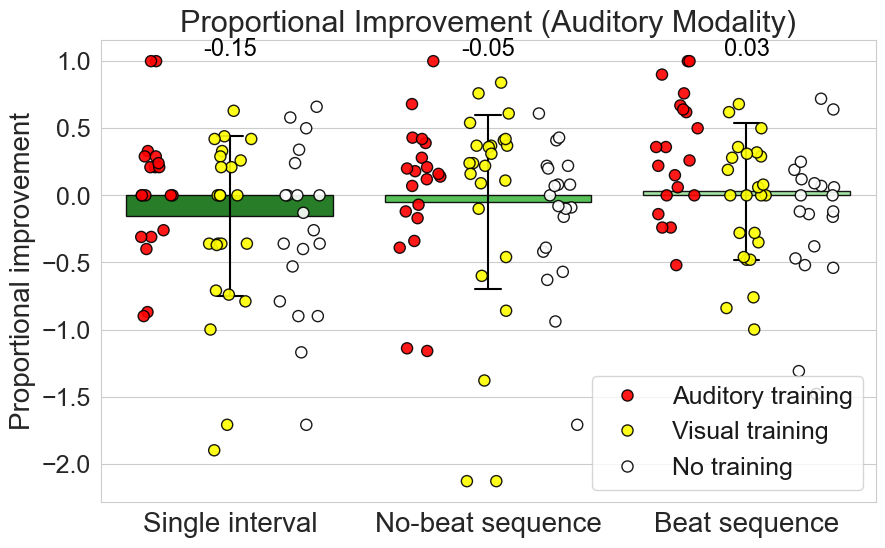

In [59]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df1, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df1, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=True, fontsize=18, labelcolor='0.1', title_fontsize='large')

# for patch in legend.legendHandles:
#     patch.set_edgecolor('black')
    
for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')


g.set_ylabel('Proportional improvement', size=20)
g.set_title('Proportional Improvement (Auditory Modality)', size=22)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')


# plt.savefig(f'../plots/proportional_imp_audperform.png', bbox_inches='tight',dpi=250)
plt.show()


In [60]:
df11=df1[df1['Group']=='aud']
df12=df1[df1['Group']=='vis']
df13=df1[df1['Group']=='notrain']
df12.head(7)

,Group,Timing_level,value
1,vis,AudSD_diff,0.44
3,vis,AudSD_diff,-0.71
4,vis,AudSD_diff,-1.90
6,vis,AudSD_diff,0.33
7,vis,AudSD_diff,-1.71
9,vis,AudSD_diff,0.29
13,vis,AudSD_diff,0.63


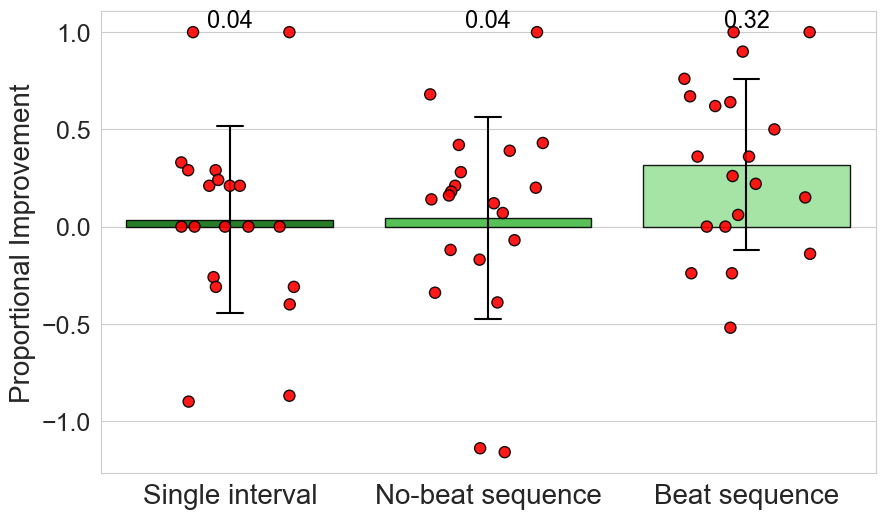

In [62]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df11, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df11, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

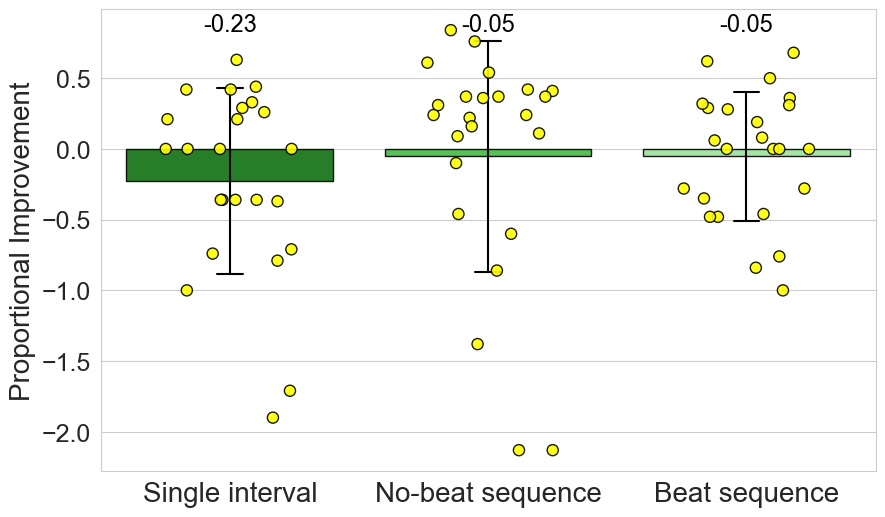

In [63]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df12, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df12, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

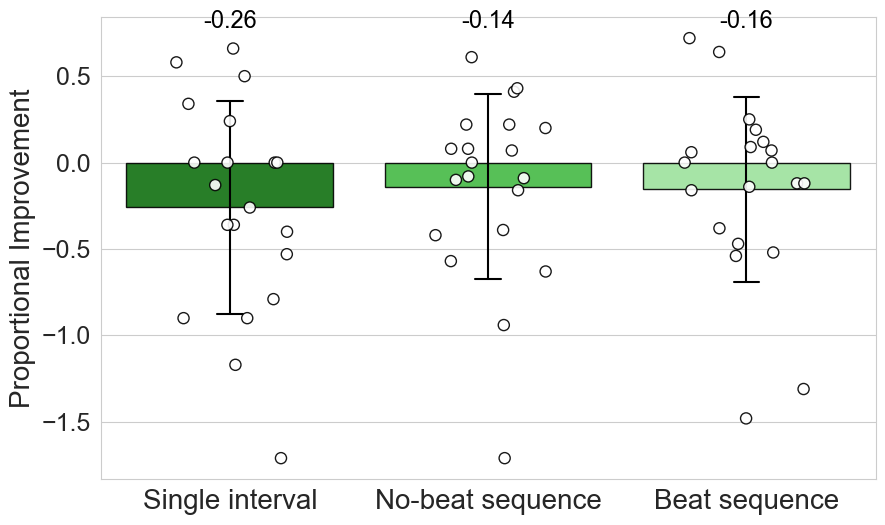

In [64]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df13, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df13, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Auditory Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.75, 0.75, 0.75]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

# Visual performance

In [65]:
df2=diff_df.melt(['Group'],['VisSD_diff','VisIrreg_diff','VisReg_diff'],var_name='Timing_level',value_name='value')
df2

,Group,Timing_level,value
0,aud,VisSD_diff,-0.31
1,vis,VisSD_diff,-0.25
2,notrain,VisSD_diff,0.00
3,vis,VisSD_diff,0.26
4,vis,VisSD_diff,0.56
...,...,...,...
187,vis,VisReg_diff,0.13
188,vis,VisReg_diff,-0.24
189,aud,VisReg_diff,0.40
190,notrain,VisReg_diff,0.13


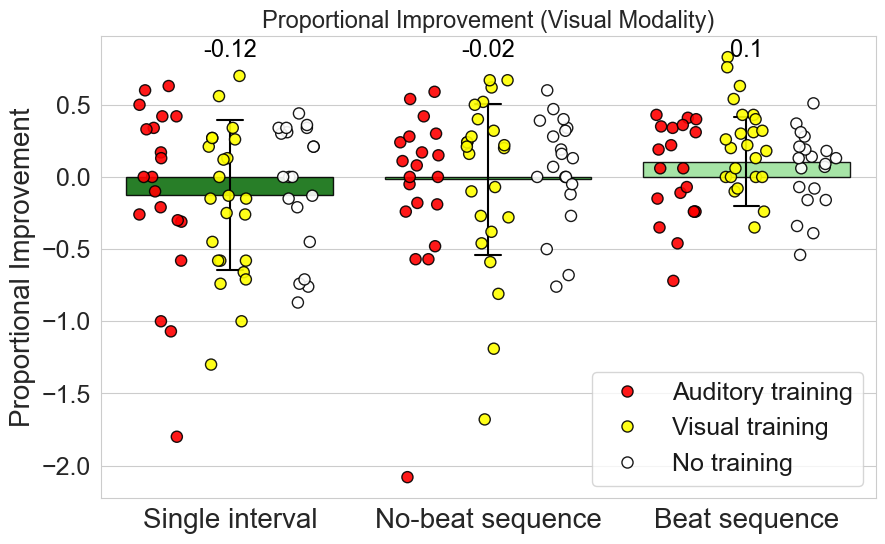

In [68]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df2, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df2, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=True, fontsize=18, labelcolor='0.1', title_fontsize='large')

for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')


g.set_ylabel('Proportional Improvement', size=20)
g.set_title('Proportional Improvement (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')


# plt.savefig(f'../plots/proportional_imp_visperform.png', bbox_inches='tight',dpi=250)
plt.show()


In [69]:
df21=df2[df2['Group']=='aud']
df22=df2[df2['Group']=='vis']
df23=df2[df2['Group']=='notrain']
df22.head(7)

,Group,Timing_level,value
1,vis,VisSD_diff,-0.25
3,vis,VisSD_diff,0.26
4,vis,VisSD_diff,0.56
6,vis,VisSD_diff,-1.00
7,vis,VisSD_diff,0.34
9,vis,VisSD_diff,0.13
13,vis,VisSD_diff,-0.66


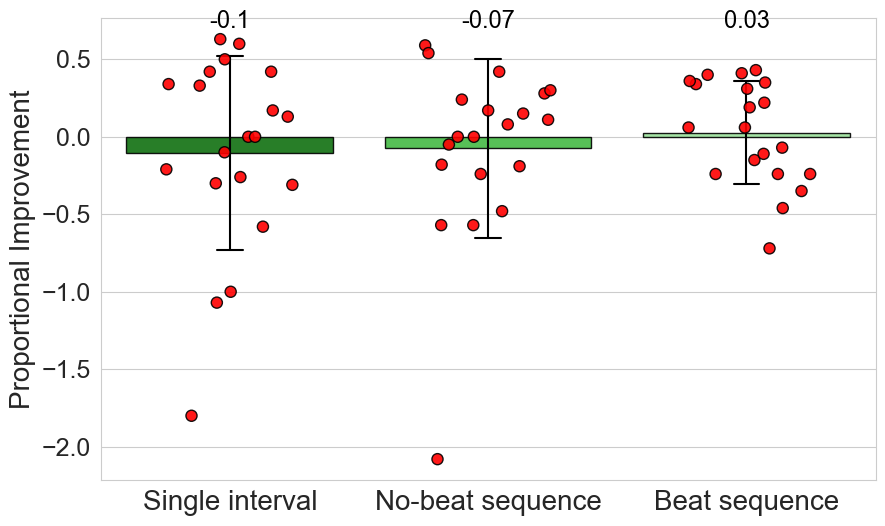

In [70]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df21, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df21, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.67, 0.67, 0.67]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

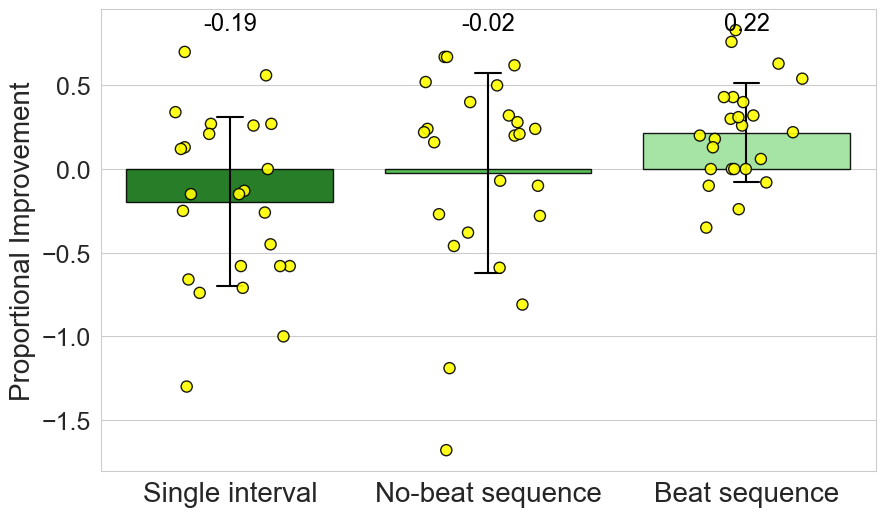

In [71]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df22, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df22, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

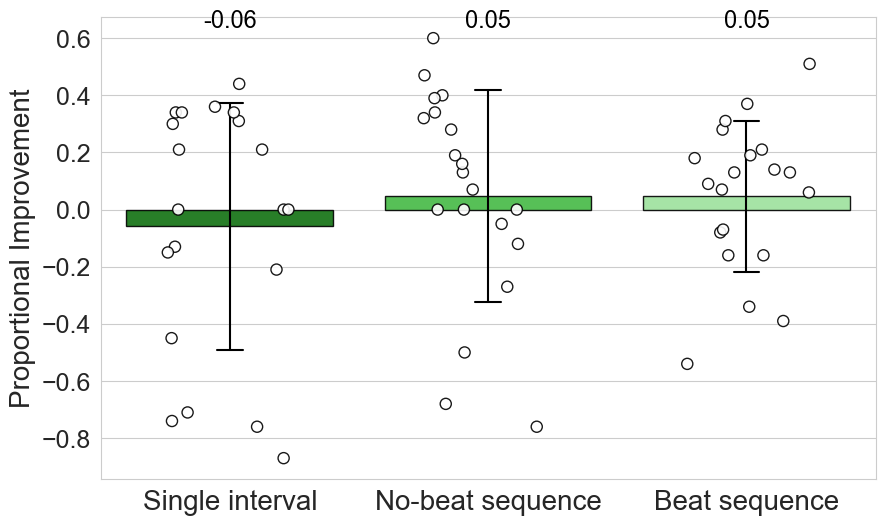

In [72]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df23, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df23, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Visual Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.62, 0.62, 0.62]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

# Tactile performance

In [73]:
df3=diff_df.melt(['Group'],['TactSD_diff','TactIrreg_diff','TactReg_diff'],var_name='Timing_level',value_name='value')
df3

,Group,Timing_level,value
0,aud,TactSD_diff,-0.37
1,vis,TactSD_diff,-0.31
2,notrain,TactSD_diff,0.21
3,vis,TactSD_diff,-0.36
4,vis,TactSD_diff,-0.79
...,...,...,...
187,vis,TactReg_diff,0.12
188,vis,TactReg_diff,0.06
189,aud,TactReg_diff,0.82
190,notrain,TactReg_diff,0.45


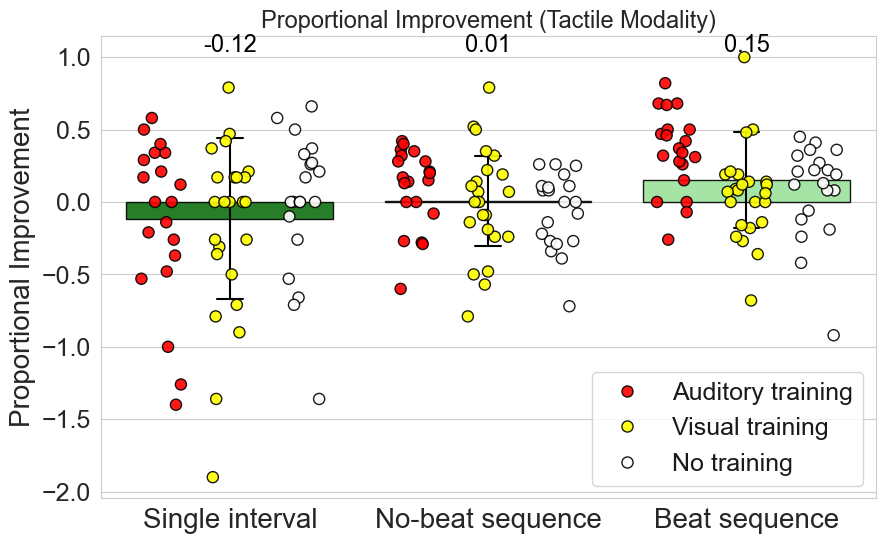

In [75]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df3, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df3, x='Timing_level', y='value', hue='Group',
              palette=['red', 'yellow', 'white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

handles, labels = g.get_legend_handles_labels()
custom_labels = ['Auditory training', 'Visual training', 'No training']

legend = g.legend(handles[:3], custom_labels, loc='lower right',
                  frameon=True, fontsize=18, labelcolor='0.1', title_fontsize='large')


for handle in legend.legendHandles:
    handle.set_markeredgecolor('black')


g.set_ylabel('Proportional Improvement', size=20)
g.set_title('Proportional Improvement (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')


# plt.savefig(f'../plots/proportional_imp_tactperform.png', bbox_inches='tight',dpi=250)
plt.show()


In [76]:
df31=df3[df3['Group']=='aud']
df32=df3[df3['Group']=='vis']
df33=df3[df3['Group']=='notrain']
df32.head(7)

,Group,Timing_level,value
1,vis,TactSD_diff,-0.31
3,vis,TactSD_diff,-0.36
4,vis,TactSD_diff,-0.79
6,vis,TactSD_diff,0.00
7,vis,TactSD_diff,-0.26
9,vis,TactSD_diff,0.00
13,vis,TactSD_diff,0.21


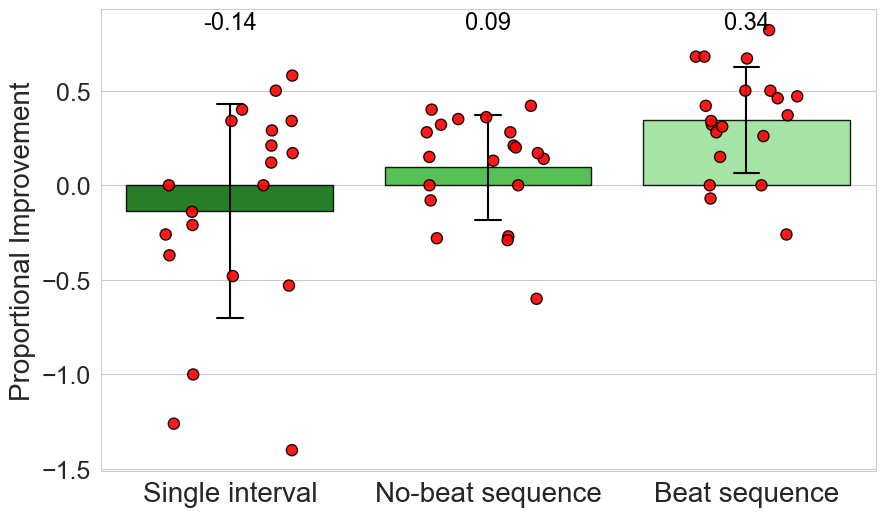

In [77]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df31, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df31, x='Timing_level', y='value', hue='Group',
              palette=['red'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.8, 0.8, 0.8]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

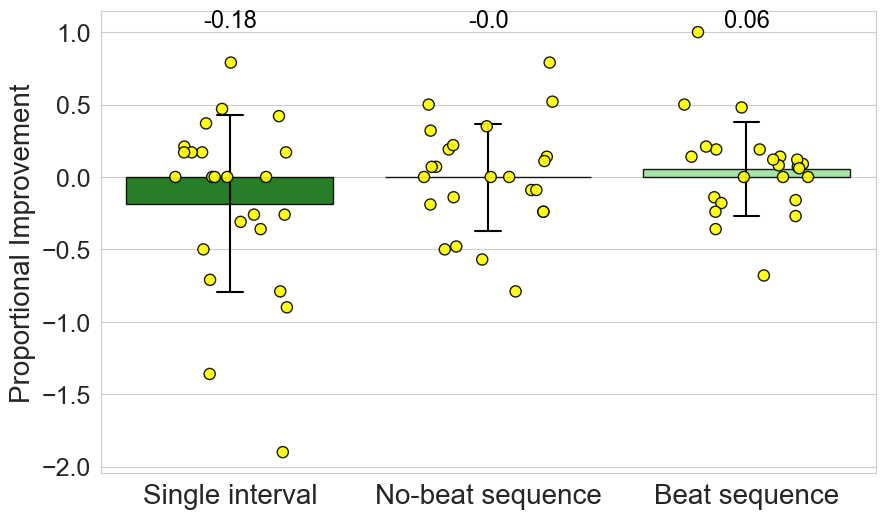

In [78]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df32, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df32, x='Timing_level', y='value', hue='Group',
              palette=['yellow'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [1, 1, 1]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
    
plt.show()

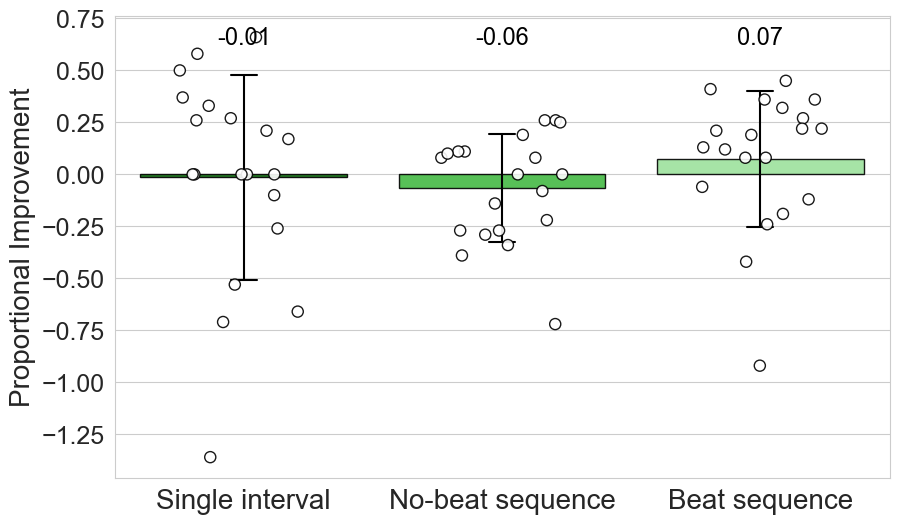

In [79]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))  
g = sns.barplot(data=df33, x='Timing_level', y='value', ci='sd', palette=['green','limegreen','lightgreen'],edgecolor='k',
               errcolor='k', errwidth=1.5, capsize=0.1, alpha=0.9)

sns.stripplot(data=df33, x='Timing_level', y='value', hue='Group',
              palette=['white'], dodge=True, jitter=0.25, alpha=0.9, edgecolor='k', linewidth=1, size=8)

plt.legend([], [], frameon=False)

g.set_ylabel('Proportional Improvement', size=20)
# g.set_title('Proportional Improvement (Tactile Modality)', size=17)
g.set_xticklabels(['Single interval','No-beat sequence','Beat sequence'],size=20)
g.set_xlabel('', size=16)
plt.tick_params(axis='y', labelsize=18)

heights = [0.6, 0.6, 0.6]  # Adjust these values to set the specific height for each label
for i, bar in enumerate(g.patches):
    g.text(bar.get_x() + bar.get_width() / 2, heights[i], round(bar.get_height(), 2),
           ha='center', va='bottom', fontsize=17, color='black')
plt.show()